# Open data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import integrate

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6) # inches
plt.rcParams['font.size'] = 9

In [3]:
columns = ['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets']
for i in range (1,39):
    columns.append( 'jet' + str(i) + '_pt' )
    columns.append( 'jet' + str(i) + '_eta' )
    columns.append( 'jet' + str(i) + '_phi' )
    columns.append( 'jet' + str(i) + '_E' )
    columns.append( 'jet' + str(i) + '_DL1R' )
    
print (columns)

['y1_pt', 'y1_eta', 'y1_phi', 'y1_E', 'y2_pt', 'y2_eta', 'y2_phi', 'y2_E', 'Njets', 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_E', 'jet1_DL1R', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_E', 'jet2_DL1R', 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_E', 'jet3_DL1R', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_E', 'jet4_DL1R', 'jet5_pt', 'jet5_eta', 'jet5_phi', 'jet5_E', 'jet5_DL1R', 'jet6_pt', 'jet6_eta', 'jet6_phi', 'jet6_E', 'jet6_DL1R', 'jet7_pt', 'jet7_eta', 'jet7_phi', 'jet7_E', 'jet7_DL1R', 'jet8_pt', 'jet8_eta', 'jet8_phi', 'jet8_E', 'jet8_DL1R', 'jet9_pt', 'jet9_eta', 'jet9_phi', 'jet9_E', 'jet9_DL1R', 'jet10_pt', 'jet10_eta', 'jet10_phi', 'jet10_E', 'jet10_DL1R', 'jet11_pt', 'jet11_eta', 'jet11_phi', 'jet11_E', 'jet11_DL1R', 'jet12_pt', 'jet12_eta', 'jet12_phi', 'jet12_E', 'jet12_DL1R', 'jet13_pt', 'jet13_eta', 'jet13_phi', 'jet13_E', 'jet13_DL1R', 'jet14_pt', 'jet14_eta', 'jet14_phi', 'jet14_E', 'jet14_DL1R', 'jet15_pt', 'jet15_eta', 'jet15_phi', 'jet15_E', 'jet15_DL1R', 'jet16_pt', 'jet

In [4]:
data = pd.read_csv('yyjets.csv', header = None, names = columns)

In [5]:
data.head()

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,76765.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,617620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,38342.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,56719.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,37675.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,76765.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,617620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,38342.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,56719.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,37675.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3,49831.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3,30260.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3,69401.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3,54267.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
photons = data.drop(data.columns[np.arange(9, 199)], axis=1)
photons

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3
...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3


# Plot photon bck variables

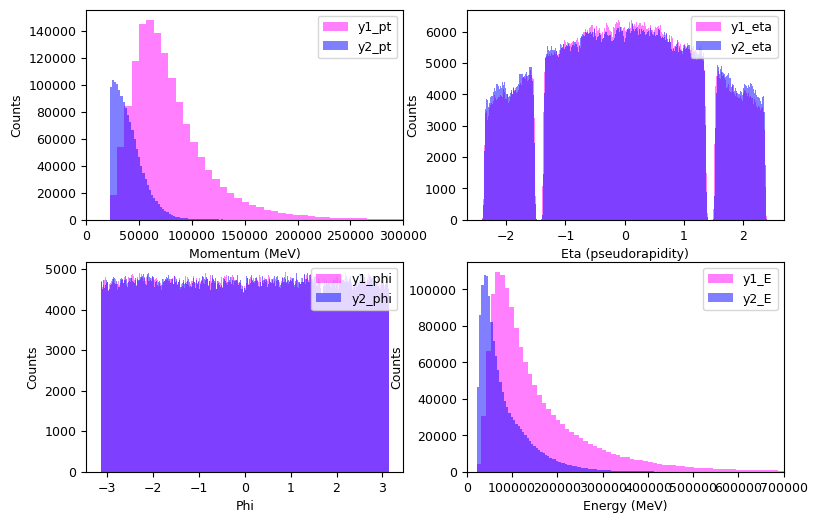

In [8]:
fig, axs = plt.subplots(2, 2)

axs[0, 0].hist(data['y1_pt'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_pt')
axs[0, 0].hist(data['y2_pt'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_pt');
axs[0,0].set_xlabel('Momentum (MeV)')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_xlim(0, 0.3e6)
axs[0,0].legend()

axs[0, 1].hist(data['y1_eta'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_eta')
axs[0, 1].hist(data['y2_eta'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_eta');
axs[0,1].set_xlabel('Eta (pseudorapidity)')
axs[0,1].set_ylabel('Counts')
axs[0,1].legend()

axs[1, 0].hist(data['y1_phi'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_phi')
axs[1, 0].hist(data['y2_phi'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_phi');
axs[1,0].set_xlabel('Phi')
axs[1,0].set_ylabel('Counts')
axs[1,0].legend()

axs[1, 1].hist(data['y1_E'], bins = 300, color = 'magenta', alpha = 0.5, label = 'y1_E')
axs[1, 1].hist(data['y2_E'], bins = 300, color = 'blue', alpha = 0.5, label = 'y2_E');
axs[1,1].set_xlabel('Energy (MeV)')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_xlim(0, 0.7e6)
axs[1,1].legend();

# 4 Mom 

In [8]:
def fomy(x, num):
    
    string = 'y' + str(num) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [9]:
data['y1_fom'] = data.apply(lambda x: fomy(x, 1), axis = 1).apply(lambda x: x)
data['y2_fom'] = data.apply(lambda x: fomy(x, 2), axis = 1).apply(lambda x: x)
data = data.assign(H_fom = data.y1_fom + data.y2_fom)

## Mass dist.

C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\1965249961.py:4: RuntimeWarning: invalid value encountered in sqrt
  H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)


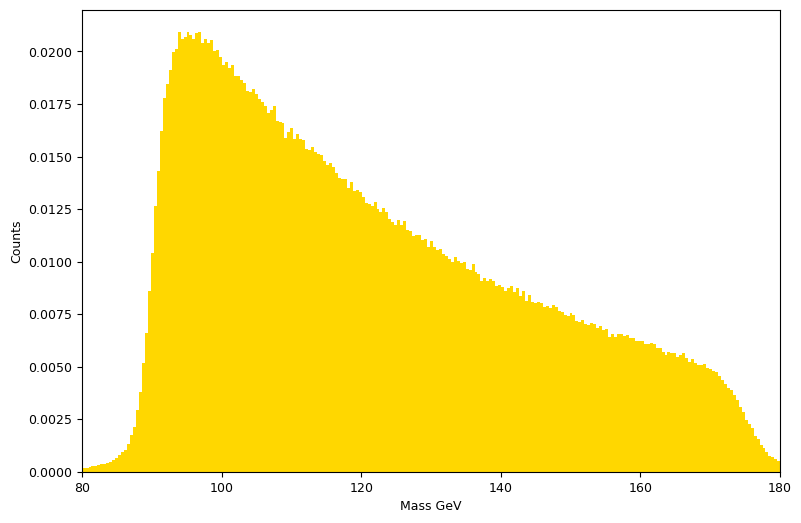

In [11]:
H_mass = []

for row in data.H_fom:
    H_mass.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(H_mass, bins = 5000, color = 'gold', density = True)
plt.xlim(80, 180)
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

In [12]:
H_array = np.array(H_mass)
vals1 = (95 < H_array)
H_array = H_array[vals1]
vals2 = (170 > H_array)
H_array = H_array[vals2]

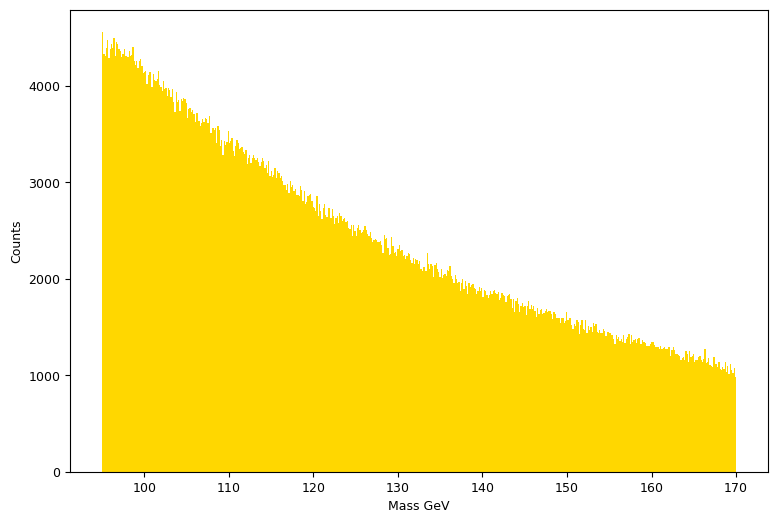

In [13]:
plt.hist(H_array, bins = 500, color = 'gold')
plt.xlabel('Mass GeV')
plt.ylabel('Counts');

## Fitting to bck (2nd/5th order polynomial)

In [14]:
def pdf_2nd(x, a, b, c):
    
    """
    Pdf with 2nd order polynomial
    """
    
    up = H_array.min()
    down = H_array.max()
    
    function = lambda x: (a*x**2 + b*x + c)
    area = integrate.quad(function, up, down)[0]
    
    
    
    return (a*x**2 + b*x + c) / area

In [15]:
def pdf_5th(x, a, b, c, d, e, f):
    
    """
    Pdf with 5th order polynomial
    """
    
    up = H_array.min()
    down = H_array.max()
    
    function = lambda x: (a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f)
    area = integrate.quad(function, up, down)[0]
    
    
    
    return (a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f) / area

In [16]:
def like_5th(a, b, c, d, e, f):
    
    """
    Likelihood function for 5th order polynomial
    """
    
    
    return -np.sum(np.log(pdf_5th(H_array, a, b, c, d, e, f)))

In [17]:
def like_2nd(a, b, c):
    
    """
    Likelihood function for 2nd order polynomial
    """
    
    
    return -np.sum(np.log(pdf_2nd(H_array, a, b, c)))

In [18]:
m_comb_2nd = Minuit(like_2nd, a = 0.1, b = 0.1, c = 0.1)

m_comb_2nd.migrad()  # run optimiser
m_comb_2nd.hesse()   # run covariance estimator

print(m_comb_2nd.values)  # print estimated values
print(m_comb_2nd.errors) 

C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\267913041.py:8: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(pdf_2nd(H_array, a, b, c)))
C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\1152783334.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  area = integrate.quad(function, up, down)[0]


<ValueView a=91.32083051704582 b=-33679.61687105616 c=3321837.2186402814>
<ErrorView a=0.784338212162152 b=246.3278149819047 c=26834.24685993004>


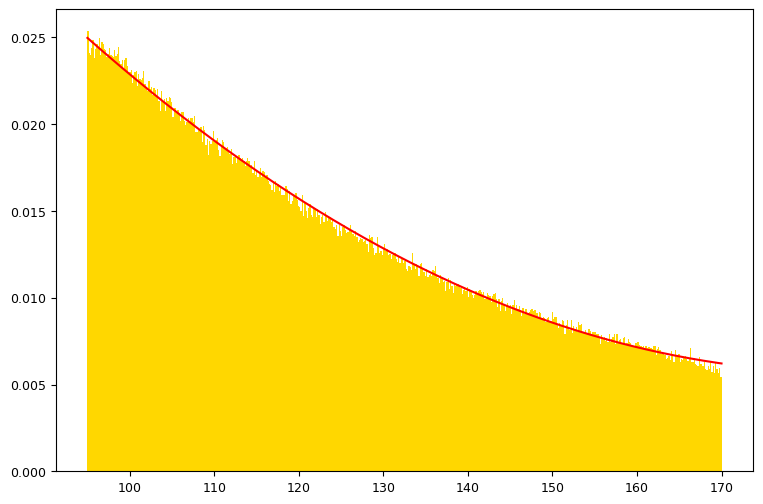

In [19]:
n2, bins2, patches2 = plt.hist(H_array, bins = 500, color = 'gold', density = True);

x2 = bins2
y2 = pdf_2nd(x2, *m_comb_2nd.values)

plt.plot(x2, y2, 'red');

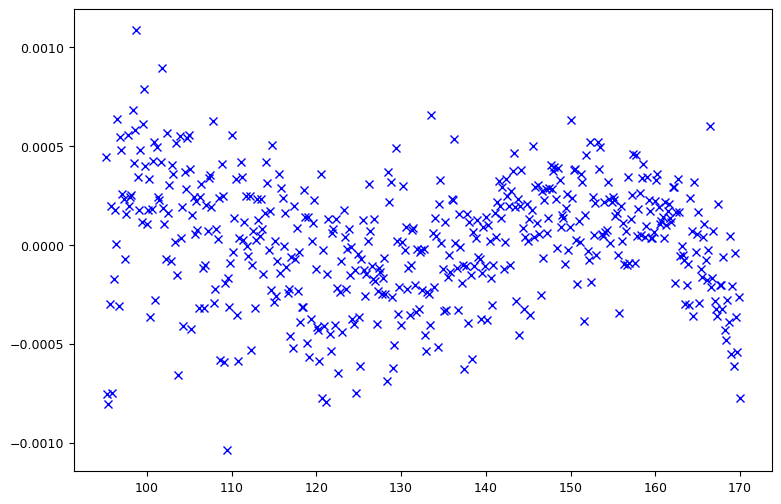

In [20]:
res2 = n2 - y2[1:]
plt.plot(x2[1:], res2, 'bx');

In [21]:
m_comb_5th = Minuit(like_5th, a = 0.01, b = 0.01, c = 0.1, d = 91, e = -33000, f = 3321837)

m_comb_5th.migrad()  # run optimiser
m_comb_5th.hesse()   # run covariance estimator

print(m_comb_5th.values)  # print estimated values
print(m_comb_5th.errors) 

C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\1936052136.py:8: RuntimeWarning: invalid value encountered in log
  return -np.sum(np.log(pdf_5th(H_array, a, b, c, d, e, f)))
C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\1480886225.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  area = integrate.quad(function, up, down)[0]


<ValueView a=-5.533195325428344e-05 b=0.01924803605281859 c=-0.8737298480194949 d=-283.0251375589186 e=18678.77229479138 f=1281691.536983477>
<ErrorView a=5.939326754026923e-08 b=1.1367208916815354e-05 c=0.0019590075842078774 d=0.3149892090077583 e=48.422387587980914 f=7599.540015295281>


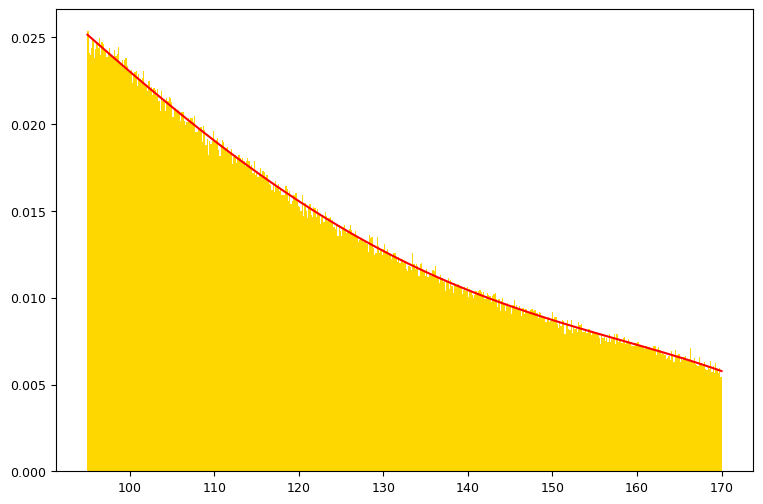

In [22]:
n5, bins5, patches5 = plt.hist(H_array, bins = 500, color = 'gold', density = True);

x5 = bins5
y5 = pdf_5th(x5, *m_comb_5th.values)

plt.plot(x5, y5, 'red');

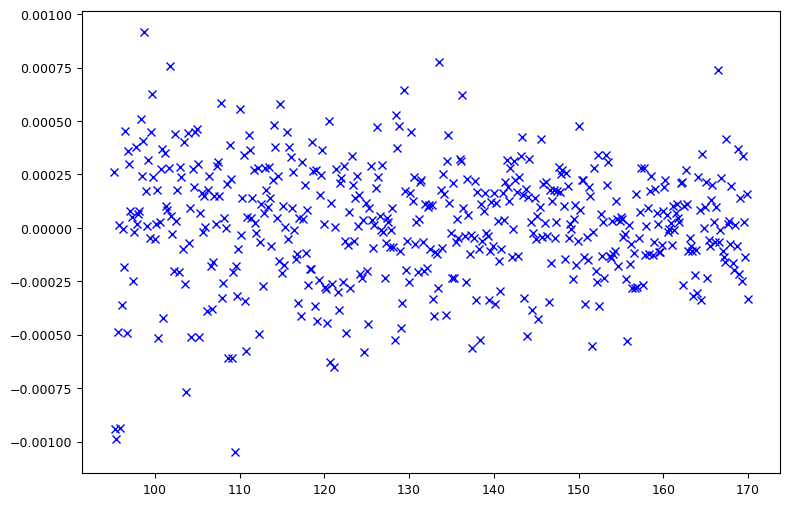

In [23]:
res = n5 - y5[1:]
plt.plot(x5[1:], res, 'bx')

In [24]:
data.describe()['Njets'][['min', 'max']]

min     3.0
max    38.0
Name: Njets, dtype: float64

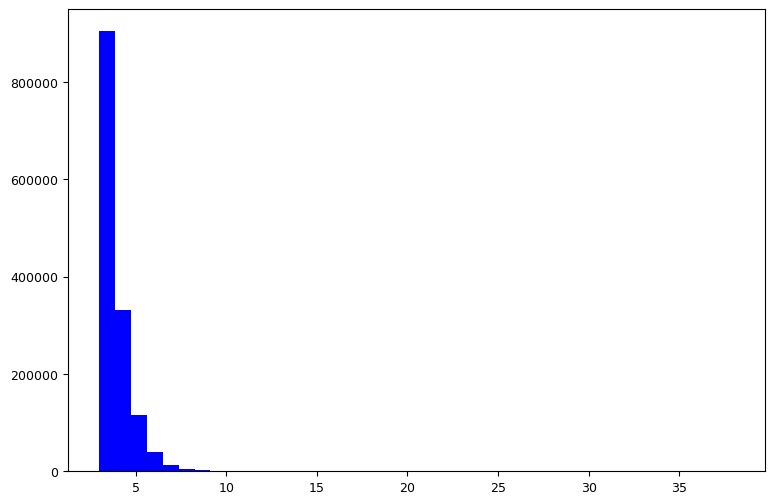

In [25]:
n, bins, patches = plt.hist(data['Njets'], bins = 40, color = 'blue');

In [26]:
pts = np.array([])

for i in range(1,39):
    string = 'jet' + str(i) + '_pt'
    array = np.array(data[string])
    pts = np.append(pts, array)

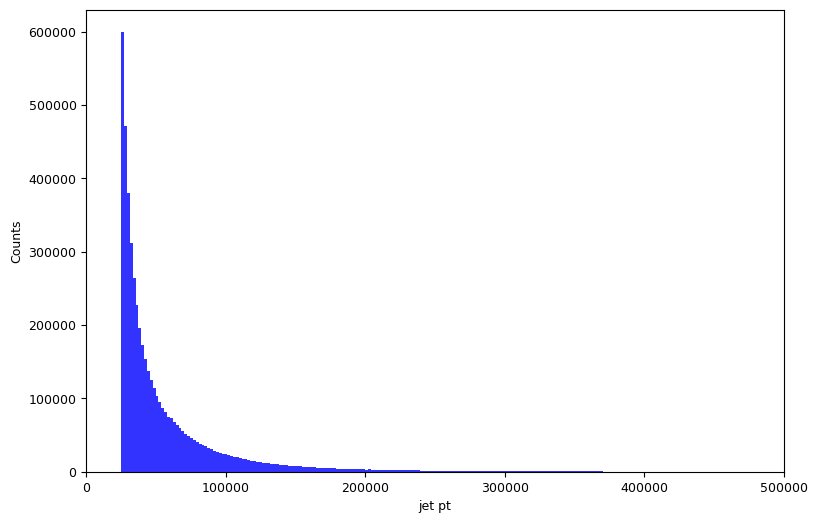

In [27]:
n, bins, patches = plt.hist(pts, bins = 1000, color = 'blue', alpha = 0.8)
plt.xlabel('jet pt')
plt.xlim(0, 0.5*1e6)
plt.ylabel('Counts');

In [28]:
dl1rs = np.array([])

for i in range(1,39):
    string = 'jet' + str(i) + '_DL1R'
    array = np.array(data[string])
    dl1rs = np.append(dl1rs, array)

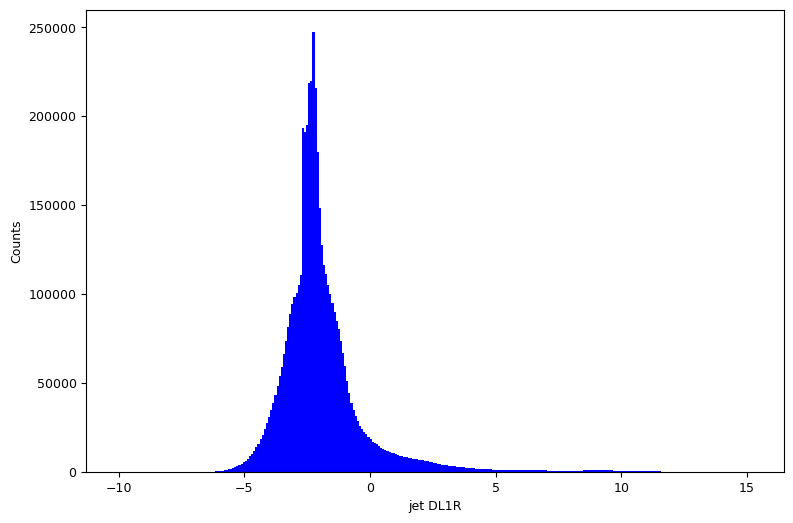

In [29]:
plt.hist(dl1rs, bins = 300, color = 'blue')
plt.xlabel('jet DL1R')
plt.ylabel('Counts');

## Reshape data 

In [10]:
datacut = data.drop(data.columns[np.arange(0, 9)], axis = 1)
datacut = datacut.drop(datacut.columns[np.arange(190, 193)], axis = 1)
datacut

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,76765.1,1.601680,2.379570,198475.0,-2.515850,69522.5,-0.060560,-1.081340,70189.7,-4.374700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,617620.0,-1.636710,-1.808150,1647000.0,-2.856810,333681.0,0.582810,1.162550,392419.0,-1.921420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38342.8,-1.968410,2.211190,140111.0,-0.488407,36811.2,0.315294,-1.380280,39204.9,0.322738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56719.1,0.618307,0.263277,68439.3,-3.902090,48663.4,-0.867529,-3.074920,68776.4,-1.002290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,37675.6,-1.152610,1.243890,65793.8,-1.413370,29497.1,-1.178390,1.880050,52921.7,-1.129100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,49831.1,2.339560,2.498170,261193.0,-1.815560,43316.0,1.508520,-0.192141,102913.0,-2.502930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410715,30260.0,0.333646,1.293100,32511.6,-0.999415,27242.4,2.415300,2.166050,153744.0,0.410663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410716,69401.7,-0.057387,2.140380,70020.2,-3.321040,41125.5,-3.072080,-1.368070,444884.0,-2.470670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1410717,54267.2,2.834820,-0.112152,463791.0,-1.836170,30037.6,-0.743589,0.378180,39181.1,-2.283530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
d_array = datacut.values
d_array_f = np.nan_to_num(d_array, nan = -9000)
data_array_r = d_array_f.reshape(1410719, 38, 5)
for i in range(1410719):
    data_array_r[i] = data_array_r[i, :, :][data_array_r[i, :, 4].argsort()[::-1]]

In [12]:
columns_sorted = []

for i in range (1,39):
    columns_sorted.append( 'jet' + str(i) + '_pt' )
    columns_sorted.append( 'jet' + str(i) + '_eta' )
    columns_sorted.append( 'jet' + str(i) + '_phi' )
    columns_sorted.append( 'jet' + str(i) + '_E' )
    columns_sorted.append( 'jet' + str(i) + '_DL1R' )

In [13]:
data_sorted_DL1R = pd.DataFrame(data_array_r.reshape(1410719, 190), columns = columns_sorted)
data_sorted_DL1R

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,42785.4,-2.700570,-0.463611,320017.0,-1.304140,51064.4,-3.312120,-1.619980,701678.0,-2.235130,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,232878.0,-0.787727,0.502943,309636.0,5.894970,45409.6,2.216170,-1.275470,210798.0,-1.733720,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,36811.2,0.315294,-1.380280,39204.9,0.322738,38342.8,-1.968410,2.211190,140111.0,-0.488407,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,48663.4,-0.867529,-3.074920,68776.4,-1.002290,26522.0,-0.426463,-2.559480,29599.6,-1.437370,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,29497.1,-1.178390,1.880050,52921.7,-1.129100,37675.6,-1.152610,1.243890,65793.8,-1.413370,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,49831.1,2.339560,2.498170,261193.0,-1.815560,35999.4,0.266273,-0.031884,37706.6,-2.011740,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410715,27242.4,2.415300,2.166050,153744.0,0.410663,30260.0,0.333646,1.293100,32511.6,-0.999415,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410716,31485.3,-1.126050,-1.726490,53907.9,-1.745290,41125.5,-3.072080,-1.368070,444884.0,-2.470670,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410717,54267.2,2.834820,-0.112152,463791.0,-1.836170,25796.7,3.929770,-1.930260,656745.0,-1.867740,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [14]:
##### sort by DL1R

In [15]:
yyjets_sorted = photons.join(data_sorted_DL1R)
yyjets_sorted

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,42785.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,232878.0,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,36811.2,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,48663.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,29497.1,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3,49831.1,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3,27242.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3,31485.3,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3,54267.2,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [16]:
yyjets_sorted.to_csv('yyjets_SDL1R.csv', index = True)

In [ ]:
########

In [34]:
b_jet_data = data_sorted_DL1R.drop(data_sorted_DL1R.columns[np.arange(5, 190)], axis=1)
b_jet_data

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R
0,42785.4,-2.700570,-0.463611,320017.0,-1.304140
1,232878.0,-0.787727,0.502943,309636.0,5.894970
2,36811.2,0.315294,-1.380280,39204.9,0.322738
3,48663.4,-0.867529,-3.074920,68776.4,-1.002290
4,29497.1,-1.178390,1.880050,52921.7,-1.129100
...,...,...,...,...,...
1410714,49831.1,2.339560,2.498170,261193.0,-1.815560
1410715,27242.4,2.415300,2.166050,153744.0,0.410663
1410716,31485.3,-1.126050,-1.726490,53907.9,-1.745290
1410717,54267.2,2.834820,-0.112152,463791.0,-1.836170


In [35]:
other_jets = data_sorted_DL1R.drop(data_sorted_DL1R.columns[np.arange(0, 5)], axis=1)
other_jets


,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,jet3_pt,jet3_eta,jet3_phi,jet3_E,jet3_DL1R,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,51064.4,-3.312120,-1.619980,701678.0,-2.235130,60083.1,2.041560,1.348130,235465.0,-2.31759,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,45409.6,2.216170,-1.275470,210798.0,-1.733720,333681.0,0.582810,1.162550,392419.0,-1.92142,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,38342.8,-1.968410,2.211190,140111.0,-0.488407,29285.8,-2.943960,-2.045990,278905.0,-2.63718,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,26522.0,-0.426463,-2.559480,29599.6,-1.437370,56719.1,0.618307,0.263277,68439.3,-3.90209,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,37675.6,-1.152610,1.243890,65793.8,-1.413370,25104.0,-0.779599,-1.672320,33548.4,-3.64452,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,35999.4,0.266273,-0.031884,37706.6,-2.011740,43316.0,1.508520,-0.192141,102913.0,-2.50293,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410715,30260.0,0.333646,1.293100,32511.6,-0.999415,26122.1,-1.872170,0.964667,87030.6,-1.29422,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410716,41125.5,-3.072080,-1.368070,444884.0,-2.470670,69401.7,-0.057387,2.140380,70020.2,-3.32104,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410717,25796.7,3.929770,-1.930260,656745.0,-1.867740,30037.6,-0.743589,0.378180,39181.1,-2.28353,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [36]:
oth_jets_array = other_jets.values.reshape(1410719, 37, 5)

In [37]:
for i in range(1410719):
    oth_jets_array[i] = oth_jets_array[i, :, :][oth_jets_array[i, :, 0].argsort()[::-1]]

In [38]:
oth_jets_sorted = pd.DataFrame(oth_jets_array.reshape(1410719, 185), columns = columns_sorted[5:])
oth_jets_sorted

,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,jet3_pt,jet3_eta,jet3_phi,jet3_E,jet3_DL1R,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,76765.1,1.601680,2.379570,198475.0,-2.515850,69522.5,-0.060560,-1.081340,70189.7,-4.37470,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,617620.0,-1.636710,-1.808150,1647000.0,-2.856810,333681.0,0.582810,1.162550,392419.0,-1.92142,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,38342.8,-1.968410,2.211190,140111.0,-0.488407,29285.8,-2.943960,-2.045990,278905.0,-2.63718,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,56719.1,0.618307,0.263277,68439.3,-3.902090,26522.0,-0.426463,-2.559480,29599.6,-1.43737,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,37675.6,-1.152610,1.243890,65793.8,-1.413370,25104.0,-0.779599,-1.672320,33548.4,-3.64452,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,43316.0,1.508520,-0.192141,102913.0,-2.502930,35999.4,0.266273,-0.031884,37706.6,-2.01174,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410715,30260.0,0.333646,1.293100,32511.6,-0.999415,26122.1,-1.872170,0.964667,87030.6,-1.29422,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410716,69401.7,-0.057387,2.140380,70020.2,-3.321040,41125.5,-3.072080,-1.368070,444884.0,-2.47067,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410717,30037.6,-0.743589,0.378180,39181.1,-2.283530,25796.7,3.929770,-1.930260,656745.0,-1.86774,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


## Join data sets

In [39]:
jets3 = b_jet_data.join(oth_jets_sorted)
jets3

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,42785.4,-2.700570,-0.463611,320017.0,-1.304140,76765.1,1.601680,2.379570,198475.0,-2.515850,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,232878.0,-0.787727,0.502943,309636.0,5.894970,617620.0,-1.636710,-1.808150,1647000.0,-2.856810,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,36811.2,0.315294,-1.380280,39204.9,0.322738,38342.8,-1.968410,2.211190,140111.0,-0.488407,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,48663.4,-0.867529,-3.074920,68776.4,-1.002290,56719.1,0.618307,0.263277,68439.3,-3.902090,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,29497.1,-1.178390,1.880050,52921.7,-1.129100,37675.6,-1.152610,1.243890,65793.8,-1.413370,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,49831.1,2.339560,2.498170,261193.0,-1.815560,43316.0,1.508520,-0.192141,102913.0,-2.502930,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410715,27242.4,2.415300,2.166050,153744.0,0.410663,30260.0,0.333646,1.293100,32511.6,-0.999415,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410716,31485.3,-1.126050,-1.726490,53907.9,-1.745290,69401.7,-0.057387,2.140380,70020.2,-3.321040,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410717,54267.2,2.834820,-0.112152,463791.0,-1.836170,30037.6,-0.743589,0.378180,39181.1,-2.283530,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


# Csv file 

In [40]:
yyjets_sorted = photons.join(jets3)
yyjets_sorted

,y1_pt,y1_eta,y1_phi,y1_E,y2_pt,y2_eta,y2_phi,y2_E,Njets,jet1_pt,...,jet37_pt,jet37_eta,jet37_phi,jet37_E,jet37_DL1R,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R
0,45689.4,-2.222350,2.873500,213308.0,34327.6,-0.185603,-0.518296,34920.5,6,42785.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1,274162.0,0.530182,2.607640,313606.0,27698.0,2.161160,2.147750,121821.0,4,232878.0,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
2,30418.2,0.466941,1.120090,33795.0,27014.9,-1.950630,-0.472384,96920.1,3,36811.2,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
3,55336.5,-1.324600,-0.814202,111409.0,46032.8,-2.354120,2.350230,244523.0,3,48663.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
4,61775.2,0.490558,-1.417570,69358.5,47886.6,0.841146,1.781310,65849.8,3,29497.1,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410714,52418.1,0.538881,2.277290,60215.0,32398.6,2.093090,-1.787410,133372.0,3,49831.1,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410715,76719.5,1.071630,-1.941890,125152.0,52648.7,1.139720,1.202260,90708.1,3,27242.4,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410716,53319.7,-0.808535,-1.011990,71718.5,30222.4,-2.236130,1.495430,143010.0,3,31485.3,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0
1410717,46443.0,0.675326,-2.353120,57442.2,33971.1,-0.278737,0.863282,35299.3,3,54267.2,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0


In [41]:
yyjets_sorted.to_csv('yyjets_sorted.csv', index = True)

In [42]:
jets3 = jets3.loc[jets3['jet1_DL1R'] > 0]

In [43]:
def fomjets(x, num):
    
    string = 'jet' + str(num) + '_'
    E = x[string + 'E']
    px = abs(x[string + 'pt']) * np.cos(x[string + 'phi'])
    py = abs(x[string + 'pt']) * np.sin(x[string + 'phi'])
    pz = x[string + 'pt']/(np.tan(2*np.arctan(np.exp(-x[string + 'eta']))))

    return np.array([E, px, py, pz])

In [44]:
for i in range (1,4):
    
    jets3['jet' + str(i) + '_fom'] = jets3.apply(lambda x: fomjets(x, i), axis = 1).apply(lambda x: x)

C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\746724520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jets3['jet' + str(i) + '_fom'] = jets3.apply(lambda x: fomjets(x, i), axis = 1).apply(lambda x: x)
C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\746724520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jets3['jet' + str(i) + '_fom'] = jets3.apply(lambda x: fomjets(x, i), axis = 1).apply(lambda x: x)
C:\Users\s1974479\AppData\Local\Temp\ipykernel_3840\746724520.py:3: SettingWithCopyWar

In [45]:
jets3 = jets3.assign(quark_fom = jets3.jet1_fom + jets3.jet2_fom + jets3.jet3_fom)

In [46]:
jets3 = jets3.assign(wboson_fom = jets3.jet2_fom + jets3.jet3_fom)

In [47]:
jets3

,jet1_pt,jet1_eta,jet1_phi,jet1_E,jet1_DL1R,jet2_pt,jet2_eta,jet2_phi,jet2_E,jet2_DL1R,...,jet38_pt,jet38_eta,jet38_phi,jet38_E,jet38_DL1R,jet1_fom,jet2_fom,jet3_fom,quark_fom,wboson_fom
1,232878.0,-0.787727,0.502943,309636.0,5.894970,617620.0,-1.636710,-1.808150,1647000.0,-2.856810,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[309636.0, 204040.20820947018, 112248.63615134...","[1647000.0, -145221.80548591848, -600304.16591...","[392419.0, 132471.48568761654, 306258.57578313...","[2349055.0, 191289.88841116824, -181796.953977...","[2039419.0, -12750.319798301934, -294045.59012..."
2,36811.2,0.315294,-1.380280,39204.9,0.322738,38342.8,-1.968410,2.211190,140111.0,-0.488407,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[39204.9, 6970.786197681913, -36145.1599142431...","[140111.0, -22910.25085525745, 30745.580456208...","[278905.0, -13398.566002104182, -26041.0543320...","[458220.9, -29338.03065967972, -31440.63379013...","[419016.0, -36308.816857361635, 4704.526124110..."
6,28345.2,0.739698,1.246290,36868.2,10.450000,76229.8,0.470292,-2.226190,85323.0,-0.722584,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[36868.2, 9037.609566066885, 26865.81426965012...","[85323.0, -46459.88276288728, -60435.599622232...","[69921.5, -14966.808253519739, -37846.88853977...","[192112.7, -52389.081450340134, -71416.6738923...","[155244.5, -61426.69101640702, -98282.48816201..."
8,28620.3,1.561500,1.827600,71458.4,6.507140,71019.9,0.214049,-2.208840,73503.1,-1.168090,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[71458.4, -7269.279892156594, 27681.7474509736...","[73503.1, -42301.2377483963, -57047.6246741584...","[333823.0, -47911.54704564026, 48611.786909178...","[478784.5, -97482.06468619316, 19245.909685993...","[407326.1, -90212.78479403656, -8435.837764979..."
11,44006.2,-0.908594,1.589980,63960.0,1.078610,128787.0,2.528350,-2.755400,812348.0,-1.085600,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[63960.0, -844.1487812430597, 43998.1028144978...","[812348.0, -119301.81963583657, -48509.4547544...","[143942.0, 54654.149360924144, -21060.49785460...","[1020250.0, -65491.81905615548, -25571.8497946...","[956290.0, -64647.67027491242, -69569.95260909..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410708,29178.7,1.013010,-0.064617,45827.8,1.665660,117468.0,1.330560,2.399760,237957.0,-4.064430,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[45827.8, 29117.80451028375, -1884.14282656580...","[237957.0, -86601.1196085868, 79366.0954472326...","[40681.8, -7063.7894245290145, 39528.709477744...","[324466.6, -64547.104522832065, 117010.6620984...","[278638.8, -93664.90903311581, 118894.80492497..."
1410709,81376.7,1.340730,-2.361580,166729.0,5.440310,28141.7,-1.965850,1.338040,102615.0,2.468940,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[166729.0, -57851.073532123766, -57231.2903407...","[102615.0, 6491.175691448672, 27382.8398277597...","[54576.9, -11571.624354400145, 24748.110672143...","[323920.9, -62931.522195075246, -5100.33984087...","[157191.9, -5080.448662951472, 52130.950499903..."
1410712,36387.6,0.836636,-1.731270,50142.2,3.220070,67765.4,-3.293630,-2.211180,914107.0,-2.354740,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[50142.2, -5814.222206742647, -35920.081485022...","[914107.0, -40490.03928674115, -54338.80892804...","[99761.5, -52829.35862995278, 12806.3747839829...","[1064010.7, -99133.62012343659, -77452.5156290...","[1013868.5, -93319.39791669394, -41532.4341440..."
1410715,27242.4,2.415300,2.166050,153744.0,0.410663,30260.0,0.333646,1.293100,32511.6,-0.999415,...,-9000.0,-9000.0,-9000.0,-9000.0,-9000.0,"[153744.0, -15275.326260633006, 22556.87844962...","[32511.6, 8295.505436391042, 29100.72489741117...","[87030.6, 14881.514483341487, 21468.6896454370...","[273286.2, 7901.693659099523, 73126.2929924745...","[119542.20000000001, 23177.019919732527, 50569..."


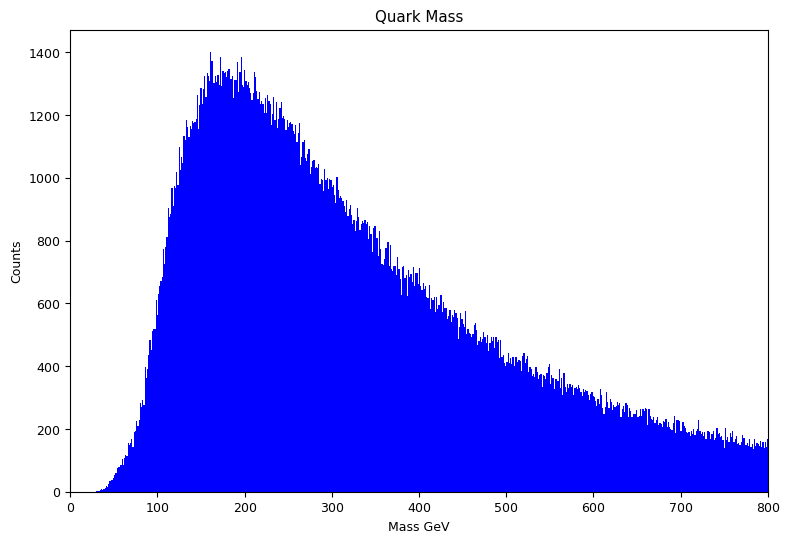

In [48]:
quark_m = []

for row in jets3.quark_fom:
    quark_m.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(quark_m, bins = 5000, color = 'blue')
plt.xlim(0, 800)
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('Quark Mass');

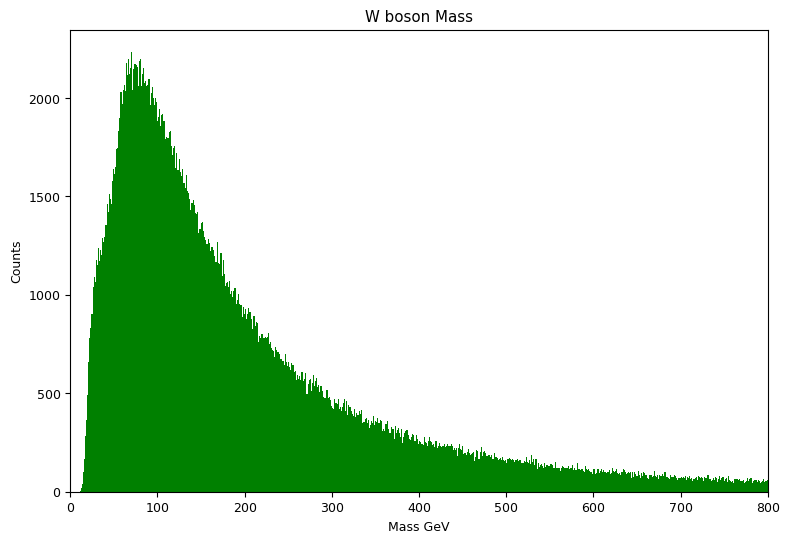

In [49]:
wboson_m = []

for row in jets3.wboson_fom:
    wboson_m.append(np.sqrt( row[0]**2 - row[1]**2 - row[2]**2 - row[3]**2 )/1000)

n, bins, patches = plt.hist(wboson_m, bins = 5000, color = 'green')
plt.xlim(0, 800)
plt.xlabel('Mass GeV')
plt.ylabel('Counts')
plt.title('W boson Mass');